In [2]:
import os

root_dir = './dataset-Simpsons_Main_Characters/'
train_dir = root_dir + 'train_images/'
test_dir = root_dir + 'test_images/'

print(os.listdir(root_dir))
dim = 100

['test_images', '.DS_Store', 'train_images']


In [3]:
def getYourFavorite(name, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['train_images', 'test_images']
    if not k_fold:
        path = root_dir + data_type + "/"
        for i,f in enumerate(name):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , name[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = root_dir +  v + "/"
            for i,f in enumerate(name):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [4]:
import glob
import cv2
import numpy as np 
from sklearn.preprocessing import StandardScaler

#Choose your name
name = ['bart_simpson' , 'lisa_simpson'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFavorite(name, 'train_images', print_n=True, k_fold=False)
X_test, y_test = getYourFavorite(name, 'test_images', print_n=True, k_fold=False)

#Get data for k-fold
X,y = getYourFavorite(name, '', print_n=True, k_fold=True)

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

There are  1261   TRAIN_IMAGES  images of  BART_SIMPSON
There are  1273   TRAIN_IMAGES  images of  LISA_SIMPSON
There are  81   TEST_IMAGES  images of  BART_SIMPSON
There are  80   TEST_IMAGES  images of  LISA_SIMPSON


In [5]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1  



bart_simpson


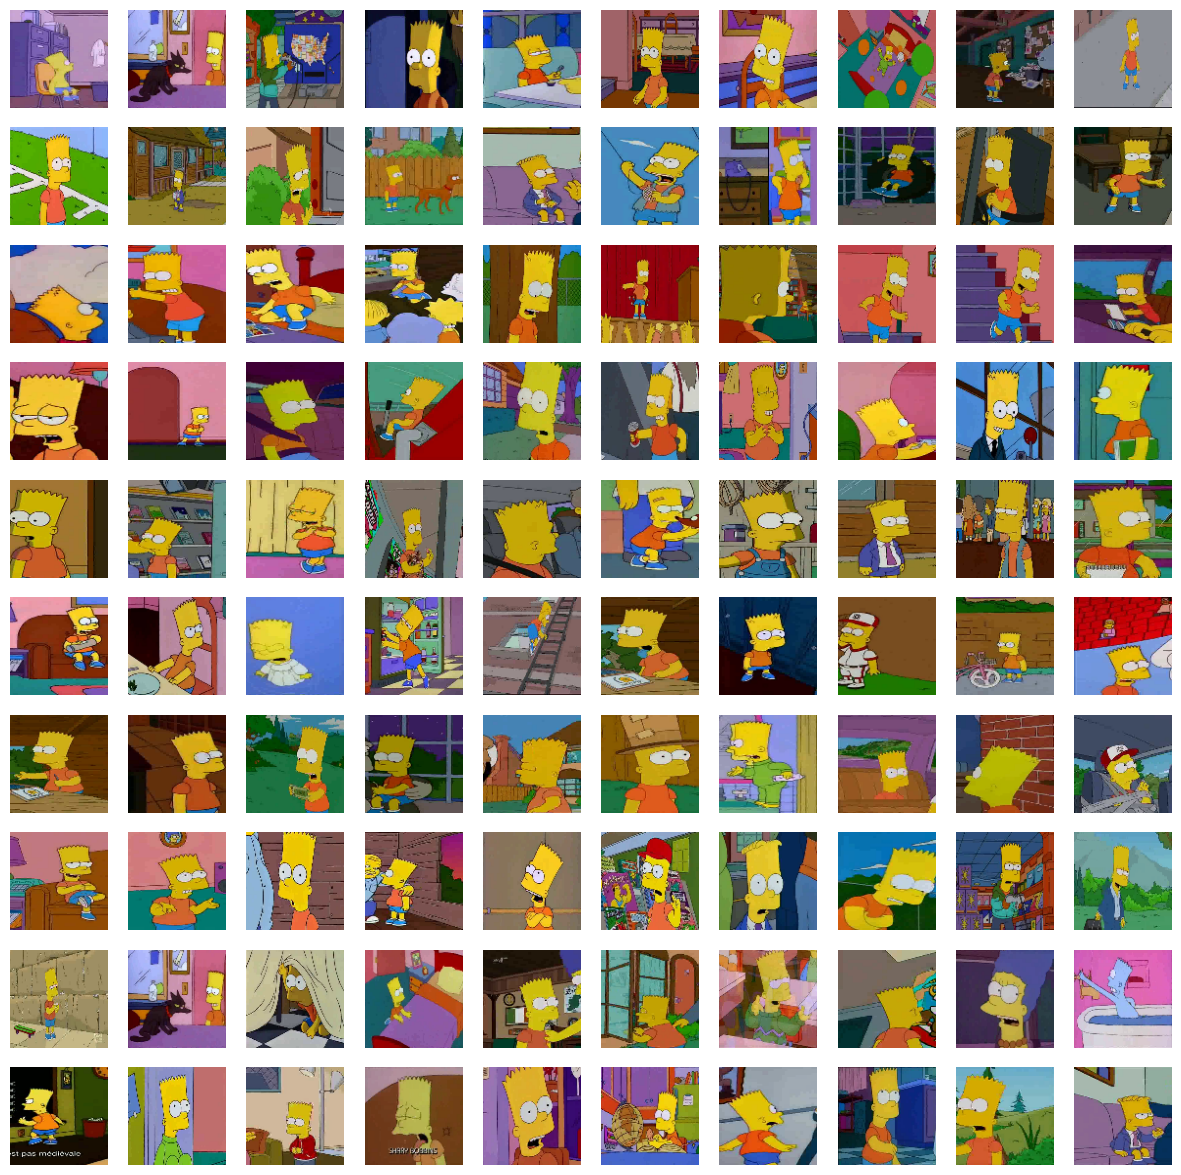

In [6]:
import matplotlib.pyplot as plt

print(name[y_train[0]])
plot_image_grid(X_t[0:100], 10, 10)

lisa_simpson


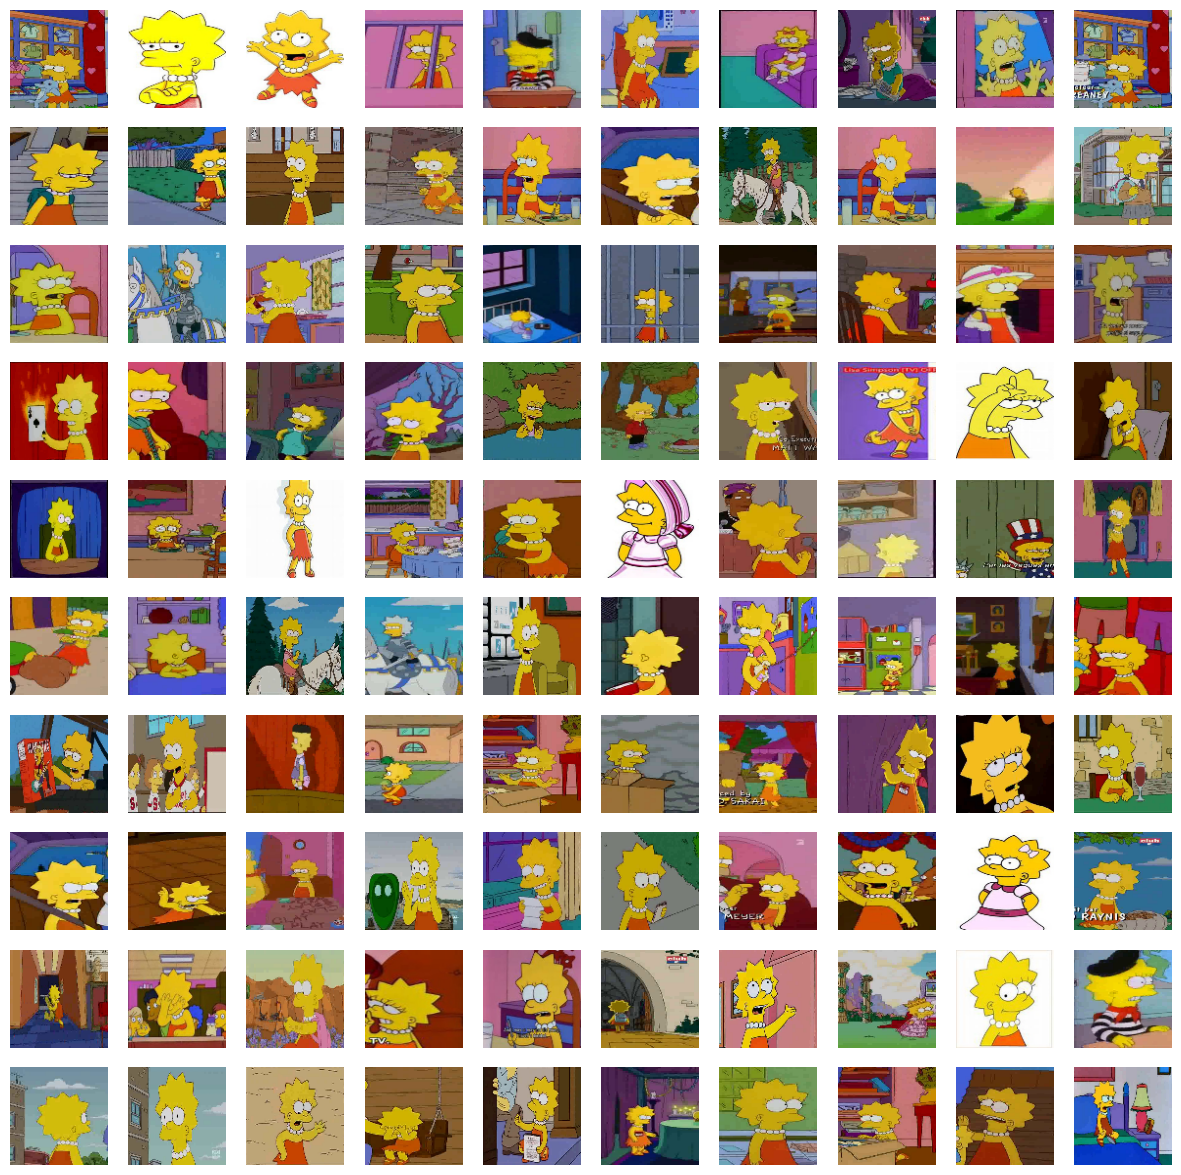

In [7]:
print(name[y_train[1261]])
plot_image_grid(X_t[1261:1361], 10, 10)

In [8]:
import matplotlib.pyplot as plt
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0 
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = name[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = name[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=name, yticklabels=name,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

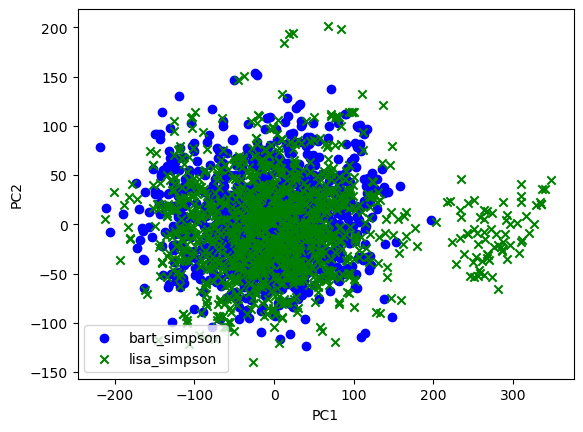

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

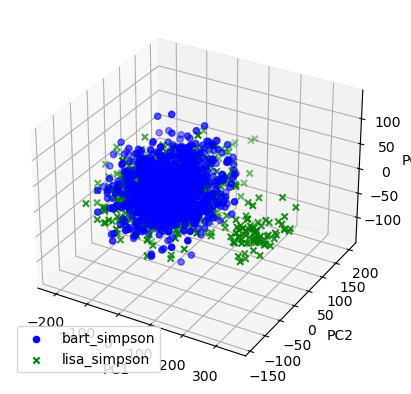

In [10]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

In [11]:
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image)
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('50 PC')
    plt.imshow(X50)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title('10 PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title('2 PC')
    plt.imshow(X2)
    plt.show()

def computePCA(n, im_scaled, image_id):
    pca = PCA(n)
    principalComponents = pca.fit_transform(im_scaled)
    im_reduced = pca.inverse_transform(principalComponents)
    newImage = scaler.inverse_transform(im_reduced[image_id])
    return newImage

def showVariance(X_train):
    #Compute manually the principal components
    cov_matr=np.dot(X_train, X_train.T)
    eigval,eigvect=np.linalg.eig(cov_matr)

    index=np.argsort(eigval)[::-1] #take in order the index of ordered vector (ascending order)

    #eigvect[:,i] is associated to eigval[i] so 
    eigvect=eigvect[:,index]
    eigval=eigval[index]

    n_PC=[]
    var_explained=[]
    var_temp=[]
    var_tmp=0
    for i in range(10):
        var_tmp=var_tmp+eigval[i]
        n_PC.append(i)
        var_temp.append(eigval[i]/(eigval.sum())*100)
        var_explained.append(var_tmp/(eigval.sum())*100)

    fig, ax = plt.subplots(figsize=(8,8))

    ind = np.arange(10)    
    width = 0.35         # the width of the bars
    p1 = ax.bar(ind, var_temp, width, color='b')
    p2 = ax.bar(ind + width, var_explained, width, color='r')

    ax.legend((p1[0], p2[0]), ('Individual explained variance', 'Cumulative explained variance'))

    ax.set_title('Variance explained using PCs')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

    plt.xlabel('Number of PC')
    plt.ylabel('Variance exaplained in %')

    ax.autoscale_view()

    plt.show()

In [12]:
image_id = 2
image = X_t[image_id]
print(image)

[[[  0  75   1]
  [  0  75   1]
  [  0  75   1]
  ...
  [ 82 112 111]
  [ 90  87 121]
  [ 58  20  97]]

 [[  0  75   1]
  [  1  74   1]
  [  1  74   1]
  ...
  [ 77 104 109]
  [ 16  10  50]
  [ 56  21  95]]

 [[  4  80   6]
  [  0  70   0]
  [  0  70   0]
  ...
  [ 75 104 102]
  [ 26  23  57]
  [ 63  24 103]]

 ...

 [[122 139 133]
  [ 71  88  82]
  [124 141 135]
  ...
  [ 96  86  74]
  [ 96  86  74]
  [ 96  86  74]]

 [[132 149 143]
  [137 154 148]
  [137 154 148]
  ...
  [ 96  86  74]
  [ 96  86  74]
  [ 92  82  70]]

 [[132 149 143]
  [137 154 148]
  [137 154 148]
  ...
  [ 96  86  74]
  [ 96  86  74]
  [ 92  82  70]]]


Accuracy with K-NN: 59.63%


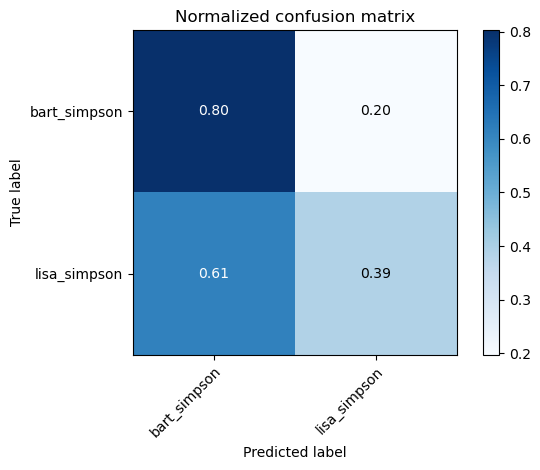

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
#KNN + K-FOLD
pred_kfold = cross_val_score(knn, X, y, cv=5) 
print("Accuracy with K-NN and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with K-NN and K-FOLD CROSS VALIDATION: 0.65 (+/- 0.04)


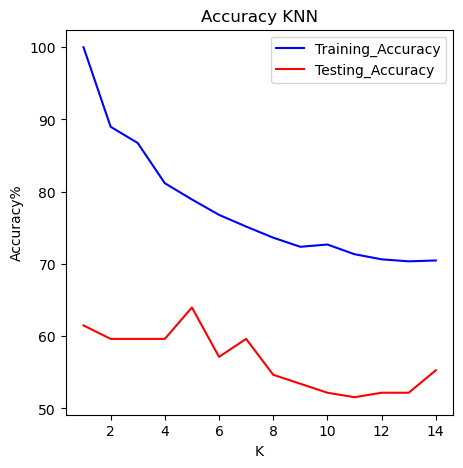

In [20]:
#CHANGING VALUES OF N
accuracy_train = []
accuracy_test = []

for i in range(1,15):   #check all possible values for 1 to 15
    k_nn = KNeighborsClassifier(n_neighbors=i)
    k_nn.fit(X_train,y_train)
    pred_i = k_nn.predict(X_test)
    accuracy_train.append(k_nn.score(X_train,y_train)*100)
    accuracy_test.append(k_nn.score(X_test,y_test)*100)
    
accuracy_train_array=np.asarray(accuracy_train)
accuracy_test_array=np.asarray(accuracy_test)
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),accuracy_train_array, label='Training_Accuracy', color='blue')
plt.plot(range(1,15),accuracy_test_array, label='Testing_Accuracy', color='red')
plt.legend()
plt.title('Accuracy KNN')
plt.xlabel('K')
plt.ylabel('Accuracy%')

plt.show()

Accuracy with K-NN considering only first 2PC: 56.52%


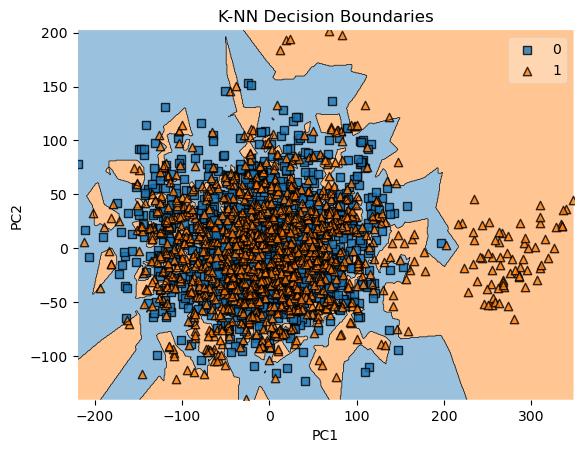

In [16]:
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)
#K-NN + PCA
knn.fit(X_train2D, y_train)
y_pred = knn.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=knn, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-NN Decision Boundaries')
plt.show()

In [ ]:
#DECISION TREE

Accuracy with Decision Tree: 55.28%


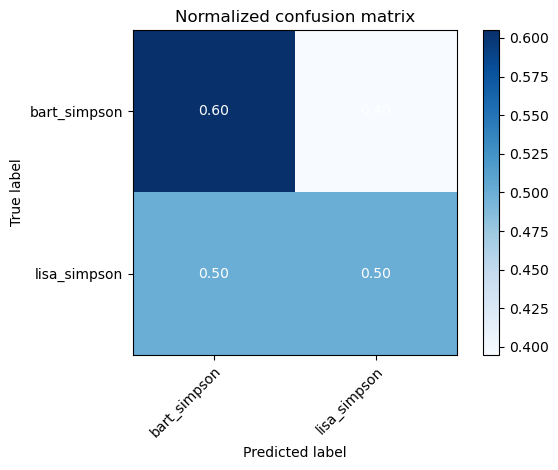

In [17]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

In [18]:
#DECISION TREE + K-FOLD
pred_kfold = cross_val_score(tree, X, y, cv=5) 
print("Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: 0.62 (+/- 0.04)


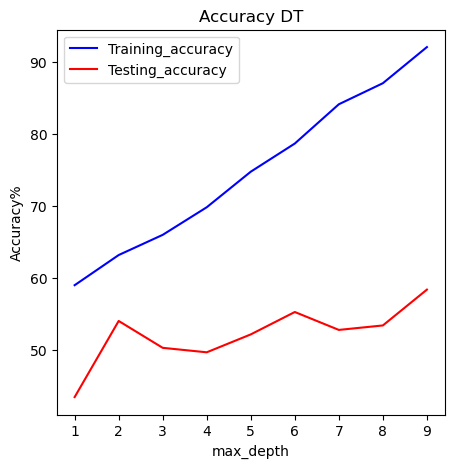

In [19]:
# CHANGING MAX_DEPTH
score_train=[]
score_test=[]

for i in range(1,10):
    dtree_md = DecisionTreeClassifier(max_depth=i)
    dtree_md.fit(X_train,y_train)
    
    score_train.append(dtree_md.score(X_train,y_train)*100)
    score_test.append(dtree_md.score(X_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(5,5))
plt.plot(range(1,10),score_train_array,color='blue', label="Training_accuracy")
plt.plot(range(1,10),score_test_array,color='red',label="Testing_accuracy")

plt.legend()
plt.xlabel('max_depth')
plt.title('Accuracy DT')
plt.ylabel('Accuracy%')
plt.show()

Accuracy with Decision Tree considering only first 2PC: 54.66%


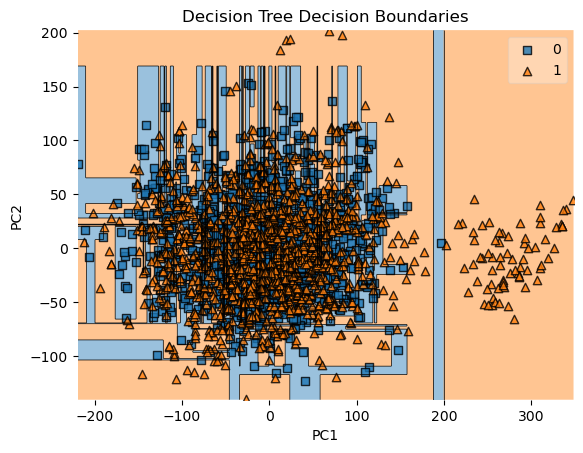

In [44]:
#DECISION TREE + PCA
tree = tree.fit(X_train2D,y_train)
y_pred = tree.predict(X_test2D)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree considering only first 2PC: {0:.2f}%".format(precision))

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=tree, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Tree Decision Boundaries')
plt.show()

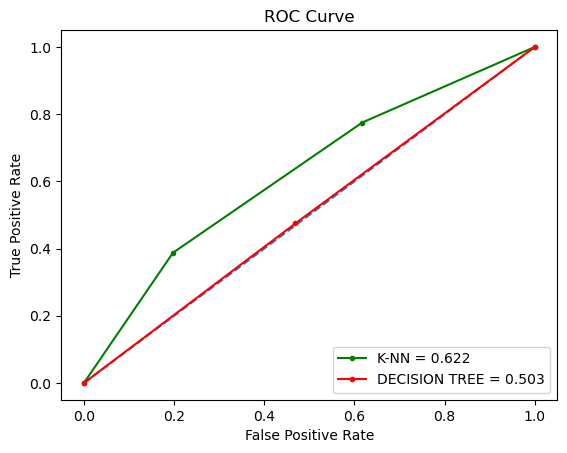

In [45]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#MULTI-CLASS CLASSIFICATION¶


In [47]:
names = ['bart_simpson', 'homer_simpson' , 'lisa_simpson', 'maggie_simpson', 'marge_simpson']

#Get Images and Labels
X, y =  getYourFavorite(names, 'train_images')
X_test, y_test = getYourFavorite(names, 'test_images')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [48]:
#K-NN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y)
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))

#DECISION TREE
model = DecisionTreeClassifier()
model.fit(X_train,y)
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with K-NN: 39.60%
Accuracy with Decision Tree: 40.59%
